## 設定基本套件與環境

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# tej_key
tej_key = 'Pu40j7vo4H5GMSNYaZY0Eyv5zM2LFp'
api_base = 'https://api.tej.com.tw'

os.environ['TEJAPI_KEY'] = tej_key 
os.environ['TEJAPI_BASE'] = api_base

In [2]:
## 使用 get_universe() 函式取得股票池
from zipline.sources.TEJ_Api_Data import get_universe

pool = get_universe(start = '2023-01-03', 
                    end = '2023-01-03',  # 選取 2023 年年初已上市的股票
                    mkt_bd_e = 'TSE',  # 填入：上市一般版股票(不含創新版)
                    stktp_e = 'Common Stock',  # 填入：普通股股票 
                    main_ind_e = 'General Industry') # general industry 篩掉金融產業
pool

Currently used TEJ API key call quota 334/1000 (33.4%)
Currently used TEJ API key data quota 3434843/10000000 (34.35%)


['1101',
 '1102',
 '1103',
 '1104',
 '1108',
 '1109',
 '1110',
 '1201',
 '1203',
 '1210',
 '1213',
 '1215',
 '1216',
 '1217',
 '1218',
 '1219',
 '1220',
 '1225',
 '1227',
 '1229',
 '1231',
 '1232',
 '1233',
 '1234',
 '1235',
 '1236',
 '1301',
 '1303',
 '1304',
 '1305',
 '1307',
 '1308',
 '1309',
 '1310',
 '1312',
 '1313',
 '1314',
 '1315',
 '1316',
 '1319',
 '1321',
 '1323',
 '1324',
 '1325',
 '1326',
 '1339',
 '1342',
 '1402',
 '1409',
 '1410',
 '1413',
 '1414',
 '1416',
 '1417',
 '1418',
 '1419',
 '1423',
 '1432',
 '1434',
 '1435',
 '1436',
 '1437',
 '1438',
 '1439',
 '1440',
 '1441',
 '1442',
 '1443',
 '1444',
 '1445',
 '1446',
 '1447',
 '1449',
 '1451',
 '1452',
 '1453',
 '1454',
 '1455',
 '1456',
 '1457',
 '1459',
 '1460',
 '1463',
 '1464',
 '1465',
 '1466',
 '1467',
 '1468',
 '1470',
 '1471',
 '1472',
 '1473',
 '1474',
 '1475',
 '1476',
 '1477',
 '1503',
 '1504',
 '1506',
 '1512',
 '1513',
 '1514',
 '1515',
 '1516',
 '1517',
 '1519',
 '1521',
 '1522',
 '1524',
 '1525',
 '1526',
 

In [3]:
## 利用 TejToolAPI 抓取所需的財務資料
import TejToolAPI

start_time = pd.Timestamp('2022-01-01')
end_time = pd.Timestamp('2023-12-29')  # 將時間字串轉換成時間格式

data = TejToolAPI.get_history_data(start = start_time,
                                   end = end_time,
                                   ticker = pool,  # 填入：正確參數名稱 & 股票池列表 ( list )
                                   fin_type = 'A', # 為累計資料，舉例來說，Q3累計：1月～9月的資料。
                                   columns = ['本益比','非流動負債合計','股東權益總計','營運產生現金流量','總股本(仟元)','稅後淨利成長率','投資產生現金流量','融資產生現金流量'],
                                   transfer_to_chinese = True)
data

Currently used TEJ API key call quota 412/1000 (41.2%)
Currently used TEJ API key data quota 4047507/10000000 (40.48%)


,股票代碼,日期,本益比,稅後淨利成長率_A,投資產生現金流量_A,融資產生現金流量_A,營運產生現金流量_A,股東權益總計_A,非流動負債合計_A,總股本(仟元)
0,1101,2022-01-03,14.00,-21.57,-4913382.0,1326492.0,12393450.0,220920689.0,106954607.0,61252340.0
1,1101,2022-01-04,13.87,-21.57,-4913382.0,1326492.0,12393450.0,220920689.0,106954607.0,61252340.0
2,1101,2022-01-05,13.83,-21.57,-4913382.0,1326492.0,12393450.0,220920689.0,106954607.0,61252340.0
3,1101,2022-01-06,13.96,-21.57,-4913382.0,1326492.0,12393450.0,220920689.0,106954607.0,61252340.0
4,1101,2022-01-07,13.91,-21.57,-4913382.0,1326492.0,12393450.0,220920689.0,106954607.0,61252340.0
...,...,...,...,...,...,...,...,...,...,...
415398,9958,2023-12-25,87.96,34.46,-4731635.0,5589440.0,-559015.0,11330201.0,14403423.0,2359796.0
415399,9958,2023-12-26,90.31,34.46,-4731635.0,5589440.0,-559015.0,11330201.0,14403423.0,2359796.0
415400,9958,2023-12-27,87.96,34.46,-4731635.0,5589440.0,-559015.0,11330201.0,14403423.0,2359796.0
415401,9958,2023-12-28,90.84,34.46,-4731635.0,5589440.0,-559015.0,11330201.0,14403423.0,2359796.0


## 選股條件一

In [4]:
# 條件一
# 取出最近年度(2023-12-29)的資料
data_last_1Y = data[data['日期'] == '2023-12-29'].reset_index(drop = True)  

# 取出股票基本資料與本益比資料方便觀察
PE_1Y_data = data_last_1Y[['股票代碼', '日期', '本益比']]

PE_1Y_data

,股票代碼,日期,本益比
0,1101,2023-12-29,29.53
1,1102,2023-12-29,14.44
2,1103,2023-12-29,73.27
3,1104,2023-12-29,8.87
4,1108,2023-12-29,8.59
...,...,...,...
854,9944,2023-12-29,6.05
855,9945,2023-12-29,18.15
856,9946,2023-12-29,120.00
857,9955,2023-12-29,NaN


In [5]:
# 依不同產業分類，計算出平均本益比
# 填入：欲進行分類的財務科目
PE_ave = PE_1Y_data.groupby('股票代碼')['本益比'].transform('mean') 

# 加入 '平均本益比' 欄位
PE_1Y_data['平均本益比'] = PE_ave
 
PE_1Y_data

,股票代碼,日期,本益比,平均本益比
0,1101,2023-12-29,29.53,29.53
1,1102,2023-12-29,14.44,14.44
2,1103,2023-12-29,73.27,73.27
3,1104,2023-12-29,8.87,8.87
4,1108,2023-12-29,8.59,8.59
...,...,...,...,...
854,9944,2023-12-29,6.05,6.05
855,9945,2023-12-29,18.15,18.15
856,9946,2023-12-29,120.00,120.00
857,9955,2023-12-29,NaN,NaN


In [6]:
set_1 = set(PE_1Y_data[PE_1Y_data['平均本益比'] <= 10]['股票代碼'])  # 篩選符合選股條件的公司
set_1

{'1104',
 '1108',
 '1218',
 '1310',
 '1312',
 '1313',
 '1314',
 '1438',
 '1568',
 '1609',
 '1808',
 '1909',
 '2008',
 '2014',
 '2025',
 '2303',
 '2305',
 '2387',
 '2390',
 '2409',
 '2443',
 '2488',
 '2489',
 '2506',
 '2520',
 '2534',
 '2535',
 '2546',
 '2603',
 '2609',
 '2615',
 '2617',
 '2618',
 '2636',
 '2702',
 '2905',
 '3022',
 '3056',
 '3308',
 '3312',
 '3432',
 '3481',
 '3708',
 '4930',
 '5525',
 '5533',
 '6116',
 '6128',
 '6414',
 '6670',
 '8101',
 '8163',
 '8201',
 '9906',
 '9919',
 '9944'}

In [7]:
len(set_1)

56

## 選股條件二

In [8]:
# 條件2
# 計算長期負債/所有者權益
data1_last_1Y = data[data['日期'].isin( ['2023-12-29'])].reset_index(drop = True)

r_1Y_data = data1_last_1Y[['股票代碼', '日期', '非流動負債合計_A','股東權益總計_A']]

r_1Y_data

,股票代碼,日期,非流動負債合計_A,股東權益總計_A
0,1101,2023-12-29,133852417.0,244726491.0
1,1102,2023-12-29,59799527.0,191706450.0
2,1103,2023-12-29,10448346.0,21993122.0
3,1104,2023-12-29,1658900.0,22777981.0
4,1108,2023-12-29,1680821.0,5004310.0
...,...,...,...,...
854,9944,2023-12-29,1079712.0,3636900.0
855,9945,2023-12-29,44133601.0,91714441.0
856,9946,2023-12-29,2601433.0,6379966.0
857,9955,2023-12-29,785288.0,1342462.0


In [9]:
#計算企業平均非流動負債
Loan_ave = r_1Y_data.groupby('股票代碼')['非流動負債合計_A'].transform('mean')
#計算企業平均所有者權益
Equity_ave=r_1Y_data.groupby('股票代碼')['股東權益總計_A'].transform('mean')

r_1Y_data['長期負債/所有者權益'] = Loan_ave/Equity_ave
r_1Y_data

,股票代碼,日期,非流動負債合計_A,股東權益總計_A,長期負債/所有者權益
0,1101,2023-12-29,133852417.0,244726491.0,0.546947
1,1102,2023-12-29,59799527.0,191706450.0,0.311933
2,1103,2023-12-29,10448346.0,21993122.0,0.475073
3,1104,2023-12-29,1658900.0,22777981.0,0.072829
4,1108,2023-12-29,1680821.0,5004310.0,0.335875
...,...,...,...,...,...
854,9944,2023-12-29,1079712.0,3636900.0,0.296877
855,9945,2023-12-29,44133601.0,91714441.0,0.481207
856,9946,2023-12-29,2601433.0,6379966.0,0.407750
857,9955,2023-12-29,785288.0,1342462.0,0.584961


In [10]:
set_2 = set(r_1Y_data[r_1Y_data['長期負債/所有者權益'] <= 1/3]['股票代碼'])  # 篩選符合選股條件的公司
set_2

{'1102',
 '1104',
 '1109',
 '1110',
 '1203',
 '1210',
 '1218',
 '1220',
 '1227',
 '1229',
 '1232',
 '1233',
 '1234',
 '1235',
 '1236',
 '1301',
 '1304',
 '1307',
 '1308',
 '1309',
 '1310',
 '1315',
 '1316',
 '1319',
 '1324',
 '1325',
 '1326',
 '1339',
 '1342',
 '1410',
 '1414',
 '1416',
 '1417',
 '1419',
 '1423',
 '1434',
 '1435',
 '1437',
 '1439',
 '1444',
 '1445',
 '1447',
 '1451',
 '1452',
 '1453',
 '1454',
 '1455',
 '1459',
 '1460',
 '1463',
 '1465',
 '1468',
 '1470',
 '1471',
 '1472',
 '1473',
 '1474',
 '1475',
 '1476',
 '1477',
 '1503',
 '1504',
 '1506',
 '1514',
 '1515',
 '1516',
 '1517',
 '1519',
 '1521',
 '1525',
 '1527',
 '1528',
 '1530',
 '1531',
 '1535',
 '1537',
 '1538',
 '1539',
 '1540',
 '1541',
 '1558',
 '1560',
 '1568',
 '1582',
 '1583',
 '1587',
 '1603',
 '1604',
 '1608',
 '1611',
 '1612',
 '1614',
 '1615',
 '1616',
 '1617',
 '1618',
 '1701',
 '1707',
 '1709',
 '1711',
 '1712',
 '1713',
 '1714',
 '1720',
 '1721',
 '1723',
 '1725',
 '1726',
 '1727',
 '1730',
 '1731',
 

In [11]:
len(set_2)

582

## 選股條件三

In [12]:
#條件3
#計算每股經營淨現金流量
data1_last_1Y = data[data['日期'].isin( ['2023-12-29'])].reset_index(drop = True)

CashFlow_1Y_data = data1_last_1Y[['股票代碼', '日期', '總股本(仟元)','營運產生現金流量_A','投資產生現金流量_A','融資產生現金流量_A']]

CashFlow_1Y_data

,股票代碼,日期,總股本(仟元),營運產生現金流量_A,投資產生現金流量_A,融資產生現金流量_A
0,1101,2023-12-29,75511817.0,19954188.0,-31530951.0,-6689946.0
1,1102,2023-12-29,35465629.0,3933530.0,-5975323.0,-4169621.0
2,1103,2023-12-29,7902475.0,-159141.0,-1875415.0,-189487.0
3,1104,2023-12-29,6732175.0,1340510.0,1121339.0,-1713091.0
4,1108,2023-12-29,NaN,498511.0,-97625.0,-384053.0
...,...,...,...,...,...,...
854,9944,2023-12-29,NaN,57256.0,-61247.0,4785.0
855,9945,2023-12-29,28442251.0,1219026.0,-432327.0,-3691712.0
856,9946,2023-12-29,3265542.0,-432835.0,105625.0,-197387.0
857,9955,2023-12-29,NaN,38854.0,-214668.0,66929.0


In [13]:
#計算企業平均流通在外股數
Stock_ave = CashFlow_1Y_data.groupby('股票代碼')['總股本(仟元)'].transform('mean')*100
#計算企業平均營運產生現金流量
OCF_ave=CashFlow_1Y_data.groupby('股票代碼')['營運產生現金流量_A'].transform('mean')
#計算企業平均投資產生現金流量
ICF_ave=CashFlow_1Y_data.groupby('股票代碼')['投資產生現金流量_A'].transform('mean')
#計算企業平均融資產生現金流量
FCF_ave=CashFlow_1Y_data.groupby('股票代碼')['融資產生現金流量_A'].transform('mean')

CashFlow_1Y_data['每股經營淨現金流量'] = (OCF_ave-ICF_ave+FCF_ave)/Stock_ave

CashFlow_1Y_data

,股票代碼,日期,總股本(仟元),營運產生現金流量_A,投資產生現金流量_A,融資產生現金流量_A,每股經營淨現金流量
0,1101,2023-12-29,75511817.0,19954188.0,-31530951.0,-6689946.0,0.005932
1,1102,2023-12-29,35465629.0,3933530.0,-5975323.0,-4169621.0,0.001618
2,1103,2023-12-29,7902475.0,-159141.0,-1875415.0,-189487.0,0.001932
3,1104,2023-12-29,6732175.0,1340510.0,1121339.0,-1713091.0,-0.002219
4,1108,2023-12-29,NaN,498511.0,-97625.0,-384053.0,NaN
...,...,...,...,...,...,...,...
854,9944,2023-12-29,NaN,57256.0,-61247.0,4785.0,NaN
855,9945,2023-12-29,28442251.0,1219026.0,-432327.0,-3691712.0,-0.000717
856,9946,2023-12-29,3265542.0,-432835.0,105625.0,-197387.0,-0.002253
857,9955,2023-12-29,NaN,38854.0,-214668.0,66929.0,NaN


In [14]:
set_3 = set(CashFlow_1Y_data[CashFlow_1Y_data['每股經營淨現金流量'] > 0]['股票代碼'])  # 篩選符合選股條件的公司
set_3

{'1101',
 '1102',
 '1103',
 '1210',
 '1215',
 '1219',
 '1229',
 '1231',
 '1235',
 '1236',
 '1305',
 '1309',
 '1312',
 '1313',
 '1314',
 '1316',
 '1339',
 '1342',
 '1409',
 '1423',
 '1432',
 '1438',
 '1444',
 '1447',
 '1449',
 '1451',
 '1453',
 '1460',
 '1473',
 '1475',
 '1506',
 '1513',
 '1514',
 '1517',
 '1528',
 '1529',
 '1532',
 '1538',
 '1558',
 '1560',
 '1582',
 '1587',
 '1597',
 '1604',
 '1605',
 '1609',
 '1615',
 '1617',
 '1618',
 '1708',
 '1717',
 '1718',
 '1727',
 '1760',
 '1773',
 '1776',
 '1783',
 '1786',
 '1795',
 '1805',
 '1806',
 '1808',
 '1810',
 '1909',
 '2006',
 '2012',
 '2017',
 '2022',
 '2023',
 '2027',
 '2031',
 '2034',
 '2038',
 '2049',
 '2062',
 '2069',
 '2106',
 '2107',
 '2114',
 '2201',
 '2206',
 '2207',
 '2208',
 '2231',
 '2301',
 '2303',
 '2312',
 '2323',
 '2327',
 '2329',
 '2330',
 '2337',
 '2338',
 '2340',
 '2344',
 '2345',
 '2348',
 '2362',
 '2364',
 '2365',
 '2367',
 '2368',
 '2374',
 '2379',
 '2383',
 '2385',
 '2387',
 '2388',
 '2395',
 '2406',
 '2408',
 

In [15]:
len(set_3)

360

## 選股條件四

In [16]:
#條件4
#計算每股經營淨現金流量
data1_last_1Y = data[data['日期'].isin( ['2023-12-29'])].reset_index(drop = True)

growth_NI_1Y_data = data1_last_1Y[['股票代碼', '日期', '稅後淨利成長率_A']]
growth_NI_1Y_data

,股票代碼,日期,稅後淨利成長率_A
0,1101,2023-12-29,382.81
1,1102,2023-12-29,-18.03
2,1103,2023-12-29,-170.14
3,1104,2023-12-29,28.09
4,1108,2023-12-29,53.77
...,...,...,...
854,9944,2023-12-29,197.23
855,9945,2023-12-29,-21.74
856,9946,2023-12-29,-86.40
857,9955,2023-12-29,-23.16


In [17]:
# 依不同產業分類，計算出平均本益比
# 填入：欲進行分類的財務科目
growth_NI_ave = growth_NI_1Y_data.groupby('股票代碼')['稅後淨利成長率_A'].transform('mean') 

# 加入 '平均本益比' 欄位
growth_NI_1Y_data['平均稅後淨利成長率']=growth_NI_ave
 
growth_NI_1Y_data

,股票代碼,日期,稅後淨利成長率_A,平均稅後淨利成長率
0,1101,2023-12-29,382.81,382.81
1,1102,2023-12-29,-18.03,-18.03
2,1103,2023-12-29,-170.14,-170.14
3,1104,2023-12-29,28.09,28.09
4,1108,2023-12-29,53.77,53.77
...,...,...,...,...
854,9944,2023-12-29,197.23,197.23
855,9945,2023-12-29,-21.74,-21.74
856,9946,2023-12-29,-86.40,-86.40
857,9955,2023-12-29,-23.16,-23.16


In [18]:
set_4 = set(growth_NI_1Y_data[growth_NI_1Y_data['平均稅後淨利成長率'] > 20]['股票代碼'])  # 篩選符合選股條件的公司
set_4

{'1101',
 '1104',
 '1108',
 '1109',
 '1110',
 '1210',
 '1213',
 '1215',
 '1220',
 '1233',
 '1307',
 '1310',
 '1312',
 '1319',
 '1321',
 '1325',
 '1416',
 '1423',
 '1437',
 '1441',
 '1442',
 '1446',
 '1455',
 '1460',
 '1463',
 '1470',
 '1472',
 '1504',
 '1519',
 '1525',
 '1529',
 '1532',
 '1533',
 '1568',
 '1582',
 '1598',
 '1603',
 '1609',
 '1611',
 '1612',
 '1615',
 '1618',
 '1702',
 '1713',
 '1714',
 '1718',
 '1722',
 '1734',
 '1735',
 '1752',
 '1783',
 '1786',
 '1795',
 '1909',
 '2007',
 '2008',
 '2010',
 '2014',
 '2020',
 '2031',
 '2033',
 '2102',
 '2105',
 '2114',
 '2201',
 '2206',
 '2208',
 '2211',
 '2247',
 '2348',
 '2355',
 '2362',
 '2364',
 '2365',
 '2382',
 '2402',
 '2404',
 '2406',
 '2409',
 '2421',
 '2429',
 '2431',
 '2434',
 '2436',
 '2438',
 '2440',
 '2442',
 '2453',
 '2457',
 '2460',
 '2462',
 '2465',
 '2471',
 '2482',
 '2486',
 '2493',
 '2495',
 '2501',
 '2509',
 '2514',
 '2527',
 '2528',
 '2538',
 '2540',
 '2542',
 '2543',
 '2546',
 '2601',
 '2605',
 '2608',
 '2610',
 

In [19]:
len(set_4)

204

## 整合每間公司符合哪些選股條件

In [20]:
company_list = data['股票代碼'].unique().tolist()
coid = {'公司代碼': company_list}

data_combine = pd.DataFrame(coid)
data_combine['選股條件 1'] = data_combine['公司代碼'].isin(set_1)
data_combine['選股條件 2'] = data_combine['公司代碼'].isin(set_2)
data_combine['選股條件 3'] = data_combine['公司代碼'].isin(set_3)
data_combine['選股條件 4'] = data_combine['公司代碼'].isin(set_4)
data_combine['符合條件數量'] = data_combine.iloc[:, 1:5].sum(axis = 1)

data_combine

,公司代碼,選股條件 1,選股條件 2,選股條件 3,選股條件 4,符合條件數量
0,1101,False,False,True,True,2
1,1102,False,True,True,False,2
2,1103,False,False,True,False,1
3,1104,True,True,False,True,3
4,1108,True,False,False,True,2
...,...,...,...,...,...,...
856,9944,True,True,False,True,3
857,9945,False,False,False,False,0
858,9946,False,False,False,False,0
859,9955,False,False,False,False,0


## 取出符合所有條件的股票

In [21]:
tickers = list(set_1 & set_2 & set_3 & set_4)
tickers

['3708', '6414', '2546']

In [22]:
len(tickers)

3

In [23]:
import TejToolAPI

start_time = pd.Timestamp('2022-01-01')
end_time = pd.Timestamp('2023-12-29')  # 將時間字串轉換成時間格式

data = TejToolAPI.get_history_data(start = start_time,
                                   end = end_time,
                                   ticker = tickers,  # 填入：正確參數名稱 & 股票池列表 ( list )
                                   fin_type = 'A', # 為累計資料，舉例來說，Q3累計：1月～9月的資料。
                                   columns = ['資料日','開盤價','最高價','最低價','收盤價'],
                                   transfer_to_chinese = True)
data

Currently used TEJ API key call quota 435/1000 (43.5%)
Currently used TEJ API key data quota 4575057/10000000 (45.75%)


,股票代碼,日期,收盤價,最低價,最高價,開盤價
0,2546,2022-01-03,49.80,49.55,50.00,49.90
1,2546,2022-01-04,49.65,49.45,49.95,49.95
2,2546,2022-01-05,49.50,49.50,49.80,49.65
3,2546,2022-01-06,49.65,49.50,49.90,49.50
4,2546,2022-01-07,49.75,49.25,49.80,49.80
...,...,...,...,...,...,...
1450,6414,2023-12-25,263.50,263.50,267.50,266.50
1451,6414,2023-12-26,267.00,264.00,267.00,264.00
1452,6414,2023-12-27,268.50,265.50,269.00,267.00
1453,6414,2023-12-28,265.50,264.50,269.50,269.00


## 取出個別標的公司股價資料

In [24]:
# 取出根基公司(建材營造)股價資料
data_2546 = data[data['股票代碼'].isin(['2546'])].reset_index(drop = True)
data_2546 = data_2546.drop(columns = '股票代碼')
data_2546['日期'] = pd.to_datetime(data_2546['日期'])
data_2546 = pd.DataFrame(data_2546).rename(columns = {'日期': 'Date', '開盤價': 'Open', '最高價': 'High', '最低價': 'Low', '收盤價': 'Close'})

data_2546

,Date,Close,Low,High,Open
0,2022-01-03,49.80,49.55,50.00,49.90
1,2022-01-04,49.65,49.45,49.95,49.95
2,2022-01-05,49.50,49.50,49.80,49.65
3,2022-01-06,49.65,49.50,49.90,49.50
4,2022-01-07,49.75,49.25,49.80,49.80
...,...,...,...,...,...
480,2023-12-25,78.00,77.60,78.00,77.60
481,2023-12-26,80.00,78.30,80.00,78.30
482,2023-12-27,79.10,78.60,80.40,80.00
483,2023-12-28,79.80,78.80,80.00,79.60


In [25]:
data_2546.to_csv('data_2546.csv')

In [26]:
# 取出上緯投控公司股價資料
data_3708 = data[data['股票代碼'].isin(['3708'])].reset_index(drop = True)
data_3708 = data_3708.drop(columns = '股票代碼')
data_3708['日期'] = pd.to_datetime(data_3708['日期'])
data_3708 = pd.DataFrame(data_3708).rename(columns = {'日期': 'Date', '開盤價': 'Open', '最高價': 'High', '最低價': 'Low', '收盤價': 'Close'})

data_3708

,Date,Close,Low,High,Open
0,2022-01-03,93.0,92.3,94.3,94.3
1,2022-01-04,93.6,92.6,94.1,93.2
2,2022-01-05,92.6,92.6,94.3,93.6
3,2022-01-06,93.5,92.3,93.7,92.6
4,2022-01-07,91.0,91.0,94.6,94.0
...,...,...,...,...,...
480,2023-12-25,98.2,97.9,98.6,98.1
481,2023-12-26,98.1,97.2,98.9,98.9
482,2023-12-27,99.0,98.3,100.5,98.6
483,2023-12-28,98.7,98.5,99.9,99.0


In [27]:
data_3708.to_csv('data_3708.csv')

In [28]:
# 取出樺漢公司(電腦/周邊設備)股價資料
data_6414 = data[data['股票代碼'].isin(['6414'])].reset_index(drop = True)
data_6414 = data_6414.drop(columns = '股票代碼')
data_6414['日期'] = pd.to_datetime(data_6414['日期'])
data_6414 = pd.DataFrame(data_6414).rename(columns = {'日期': 'Date', '開盤價': 'Open', '最高價': 'High', '最低價': 'Low', '收盤價': 'Close'})

data_6414

,Date,Close,Low,High,Open
0,2022-01-03,244.0,235.5,245.0,239.5
1,2022-01-04,251.0,240.0,251.0,242.0
2,2022-01-05,276.0,267.5,276.0,276.0
3,2022-01-06,258.0,257.0,272.0,270.5
4,2022-01-07,244.0,244.0,263.0,262.5
...,...,...,...,...,...
480,2023-12-25,263.5,263.5,267.5,266.5
481,2023-12-26,267.0,264.0,267.0,264.0
482,2023-12-27,268.5,265.5,269.0,267.0
483,2023-12-28,265.5,264.5,269.5,269.0


In [29]:
data_6414.to_csv('data_6414.csv')

## 斐波那契回調 & 移動平均線

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_2546 = pd.read_csv('data_2546.csv') # 載入股價資料
df_3708 = pd.read_csv('data_3708.csv')
df_6414 = pd.read_csv('data_6414.csv')

In [31]:
# 取得 Pivot High and Pivot Low
def calculate_pivots(df_2546, length):
    df_2546['PivotHigh'] = df_2546['High'].rolling(window=length, center=True).max()
    df_2546['PivotLow'] = df_2546['Low'].rolling(window=length, center=True).min()
    df_2546['PivotHigh'] = df_2546.apply(lambda x: x['Close'] if x['Close'] == x['PivotHigh'] else None, axis=1)
    df_2546['PivotLow'] = df_2546.apply(lambda x: x['Close'] if x['Close'] == x['PivotLow'] else None, axis=1)
    return df_2546

In [32]:
def plot_fibonacci_levels(df_2546, length, show_zero_and_half):
    df_2546 = calculate_pivots(df_2546, length)
    
    # 日期列的格式，確保 'Date'是 datetime 類型
    if not pd.api.types.is_datetime64_any_dtype(df_2546['Date']):
        df_2546['Date'] = pd.to_datetime(df_2546['Date'])

    # Find the latest Pivot High and Pivot Low
    last_pivot_high = df_2546['PivotHigh'].dropna().iloc[-1]
    last_pivot_low = df_2546['PivotLow'].dropna().iloc[-1]

    highest_since_last_pivot_low = df_2546.loc[df_2546['PivotLow'].dropna().index[-1]:]['High'].max()
    lowest_since_last_pivot_high = df_2546.loc[df_2546['PivotHigh'].dropna().index[-1]:]['Low'].min()

    # 計算 Fibonacci levels
    fib_0_618 = highest_since_last_pivot_low - (highest_since_last_pivot_low - last_pivot_low) * 0.618
    fib_0_5 = highest_since_last_pivot_low - (highest_since_last_pivot_low - last_pivot_low) * 0.5
    fib_0_382 = highest_since_last_pivot_low - (highest_since_last_pivot_low - last_pivot_low) * 0.382 if show_zero_and_half else None

    # 判斷上漲或下跌趨勢
    if df_2546.loc[df_2546['PivotHigh'].dropna().index[-1], 'Date'] > df_2546.loc[df_2546['PivotLow'].dropna().index[-1], 'Date']:
        trend = "up"
    else:
        trend = "down"

    
    ### 移動平均 (MA)
    # 計算移動平均線長度
    ma_length = abs((df_2546.loc[df_2546['PivotHigh'].dropna().index[-1], 'Date'] - df_2546.loc[df_2546['PivotLow'].dropna().index[-1], 'Date']).days)
    df_2546['MA'] = df_2546['Close'].rolling(window=ma_length).mean()

    ma_buy_range = []
    ma_sell_range = []

    if trend == "up":  # 上漲時，fib_0_5 到 fib_0_618的區間
        ma_buy_range = (df_2546['Close'] >= df_2546['MA']) & (df_2546['Close'] >= fib_0_5) & (df_2546['Close'] < fib_0_618)
    elif trend == "down":
        if show_zero_and_half and fib_0_382 is not None:  # 下降時，fib_0_382 到 fib_0_5的區間
            ma_sell_range = (df_2546['Close'] < df_2546['MA']) & (df_2546['Close'] >= fib_0_382) & (df_2546['Close'] < fib_0_5)
        else:  # 下降時，fib_0_5 到 fib_0_618的區間
            ma_sell_range = (df_2546['Close'] < df_2546['MA']) & (df_2546['Close'] >= fib_0_5) & (df_2546['Close'] < fib_0_618)


    # 畫圖
    plt.figure(figsize=(14, 7))
    plt.plot(df_2546['Date'], df_2546['Close'], label='Close Price')

    plt.axhline(fib_0_618, color='orange', linestyle='--', label='GP 0.618')
    plt.axhline(fib_0_5, color='yellow', linestyle='--', label='GP 0.5')

    if show_zero_and_half:
        plt.axhline(fib_0_382, color='blue', linestyle='--', label='GP 0.382')

    # 標示買和賣的區間
    if trend == "up":
        plt.fill(df_2546['Date'], ma_buy_range, color='red', alpha=0.3)
        plt.fill_between(df_2546['Date'], fib_0_382, fib_0_5, color='red', alpha=0.3)
    elif trend == "down":
        plt.fill(df_2546['Date'], ma_sell_range, color='green', alpha=0.3)
        
    # 標出 Pivot 點
    plt.scatter(df_2546['Date'], df_2546['PivotHigh'], color='black', marker='v', label='Pivot High')
    plt.scatter(df_2546['Date'], df_2546['PivotLow'], color='black', marker='^', label='Pivot Low')

    plt.legend()
    plt.title('Auto Fibonacci Golden Pocket')
    plt.show()

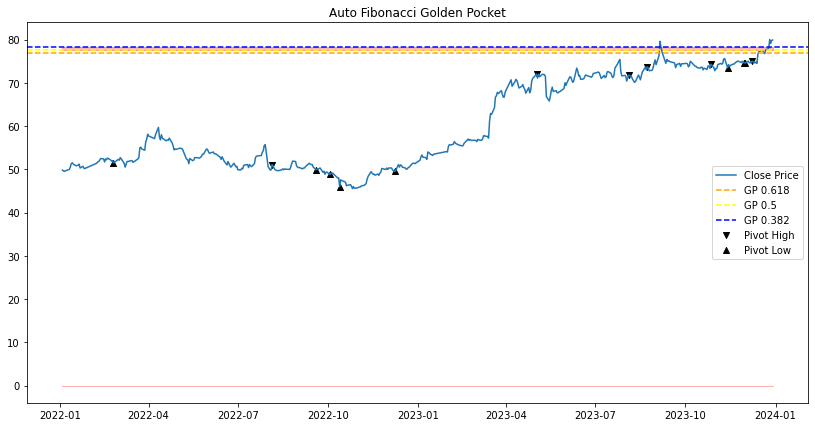

In [33]:
# 顯示圖形
plot_fibonacci_levels(df_2546, length=5, show_zero_and_half=True)

In [34]:
# 取得 Pivot High and Pivot Low
def calculate_pivots(df_3708, length):
    df_3708['PivotHigh'] = df_3708['High'].rolling(window=length, center=True).max()
    df_3708['PivotLow'] = df_3708['Low'].rolling(window=length, center=True).min()
    df_3708['PivotHigh'] = df_3708.apply(lambda x: x['Close'] if x['Close'] == x['PivotHigh'] else None, axis=1)
    df_3708['PivotLow'] = df_3708.apply(lambda x: x['Close'] if x['Close'] == x['PivotLow'] else None, axis=1)
    return df_3708

In [35]:
def plot_fibonacci_levels(df_3708, length, show_zero_and_half):
    df_3708 = calculate_pivots(df_3708, length)
    
    # 日期列的格式，確保 'Date'是 datetime 類型
    if not pd.api.types.is_datetime64_any_dtype(df_3708['Date']):
        df_3708['Date'] = pd.to_datetime(df_3708['Date'])

    # Find the latest Pivot High and Pivot Low
    last_pivot_high = df_3708['PivotHigh'].dropna().iloc[-1]
    last_pivot_low = df_3708['PivotLow'].dropna().iloc[-1]

    highest_since_last_pivot_low = df_3708.loc[df_3708['PivotLow'].dropna().index[-1]:]['High'].max()
    lowest_since_last_pivot_high = df_3708.loc[df_3708['PivotHigh'].dropna().index[-1]:]['Low'].min()

    # 計算 Fibonacci levels
    fib_0_618 = highest_since_last_pivot_low - (highest_since_last_pivot_low - last_pivot_low) * 0.618
    fib_0_5 = highest_since_last_pivot_low - (highest_since_last_pivot_low - last_pivot_low) * 0.5
    fib_0_382 = highest_since_last_pivot_low - (highest_since_last_pivot_low - last_pivot_low) * 0.382 if show_zero_and_half else None

    # 判斷上漲或下跌趨勢
    if df_3708.loc[df_3708['PivotHigh'].dropna().index[-1], 'Date'] > df_3708.loc[df_3708['PivotLow'].dropna().index[-1], 'Date']:
        trend = "up"
    else:
        trend = "down"

    
    ### 移動平均 (MA)
    # 計算移動平均線長度
    ma_length = abs((df_3708.loc[df_3708['PivotHigh'].dropna().index[-1], 'Date'] - df_3708.loc[df_3708['PivotLow'].dropna().index[-1], 'Date']).days)
    df_3708['MA'] = df_3708['Close'].rolling(window=ma_length).mean()

    ma_buy_range = []
    ma_sell_range = []

    if trend == "up":  # 上漲時，fib_0_5 到 fib_0_618的區間
        ma_buy_range = (df_3708['Close'] >= df_3708['MA']) & (df_3708['Close'] >= fib_0_5) & (df_3708['Close'] < fib_0_618)
    elif trend == "down":
        if show_zero_and_half and fib_0_382 is not None:  # 下降時，fib_0_382 到 fib_0_5的區間
            ma_sell_range = (df_3708['Close'] < df_3708['MA']) & (df_3708['Close'] >= fib_0_382) & (df_3708['Close'] < fib_0_5)
        else:  # 下降時，fib_0_5 到 fib_0_618的區間
            ma_sell_range = (df_3708['Close'] < df_3708['MA']) & (df_3708['Close'] >= fib_0_5) & (df_3708['Close'] < fib_0_618)


    # 畫圖
    plt.figure(figsize=(14, 7))
    plt.plot(df_3708['Date'], df_3708['Close'], label='Close Price')

    plt.axhline(fib_0_618, color='orange', linestyle='--', label='GP 0.618')
    plt.axhline(fib_0_5, color='yellow', linestyle='--', label='GP 0.5')

    if show_zero_and_half:
        plt.axhline(fib_0_382, color='blue', linestyle='--', label='GP 0.382')

    # 標示買和賣的區間
    if trend == "up":
        plt.fill(df_3708['Date'], ma_buy_range, color='red', alpha=0.3)
        plt.fill_between(df_3708['Date'], fib_0_382, fib_0_5, color='red', alpha=0.3)
    elif trend == "down":
        plt.fill(df_3708['Date'], ma_sell_range, color='green', alpha=0.3)
        
    # 標出 Pivot 點
    plt.scatter(df_3708['Date'], df_3708['PivotHigh'], color='black', marker='v', label='Pivot High')
    plt.scatter(df_3708['Date'], df_3708['PivotLow'], color='black', marker='^', label='Pivot Low')

    plt.legend()
    plt.title('Auto Fibonacci Golden Pocket')
    plt.show()

In [36]:
# 顯示圖形
plot_fibonacci_levels(df_3708, length=5, show_zero_and_half=True)

IndexError: single positional indexer is out-of-bounds

In [37]:
# 取得 Pivot High and Pivot Low
def calculate_pivots(df_6414, length):
    df_6414['PivotHigh'] = df_6414['High'].rolling(window=length, center=True).max()
    df_6414['PivotLow'] = df_6414['Low'].rolling(window=length, center=True).min()
    df_6414['PivotHigh'] = df_6414.apply(lambda x: x['Close'] if x['Close'] == x['PivotHigh'] else None, axis=1)
    df_6414['PivotLow'] = df_6414.apply(lambda x: x['Close'] if x['Close'] == x['PivotLow'] else None, axis=1)
    return df_6414

In [38]:
def plot_fibonacci_levels(df_6414, length, show_zero_and_half):
    df_6414 = calculate_pivots(df_6414, length)
    
    # 日期列的格式，確保 'Date'是 datetime 類型
    if not pd.api.types.is_datetime64_any_dtype(df_6414['Date']):
        df_6414['Date'] = pd.to_datetime(df_6414['Date'])

    # Find the latest Pivot High and Pivot Low
    last_pivot_high = df_6414['PivotHigh'].dropna().iloc[-1]
    last_pivot_low = df_6414['PivotLow'].dropna().iloc[-1]

    highest_since_last_pivot_low = df_6414.loc[df_6414['PivotLow'].dropna().index[-1]:]['High'].max()
    lowest_since_last_pivot_high = df_6414.loc[df_6414['PivotHigh'].dropna().index[-1]:]['Low'].min()

    # 計算 Fibonacci levels
    fib_0_618 = highest_since_last_pivot_low - (highest_since_last_pivot_low - last_pivot_low) * 0.618
    fib_0_5 = highest_since_last_pivot_low - (highest_since_last_pivot_low - last_pivot_low) * 0.5
    fib_0_382 = highest_since_last_pivot_low - (highest_since_last_pivot_low - last_pivot_low) * 0.382 if show_zero_and_half else None

    # 判斷上漲或下跌趨勢
    if df_6414.loc[df_6414['PivotHigh'].dropna().index[-1], 'Date'] >df_6414.loc[df_6414['PivotLow'].dropna().index[-1], 'Date']:
        trend = "up"
    else:
        trend = "down"

    
    ### 移動平均 (MA)
    # 計算移動平均線長度
    ma_length = abs((df_6414.loc[df_6414['PivotHigh'].dropna().index[-1], 'Date'] - df_6414.loc[df_6414['PivotLow'].dropna().index[-1], 'Date']).days)
    df_6414['MA'] = df_6414['Close'].rolling(window=ma_length).mean()

    ma_buy_range = []
    ma_sell_range = []

    if trend == "up":  # 上漲時，fib_0_5 到 fib_0_618的區間
        ma_buy_range = (df_6414['Close'] >= df_6414['MA']) & (df_6414['Close'] >= fib_0_5) & (df_6414['Close'] < fib_0_618)
    elif trend == "down":
        if show_zero_and_half and fib_0_382 is not None:  # 下降時，fib_0_382 到 fib_0_5的區間
            ma_sell_range = (df_6414['Close'] < df_6414['MA']) & (df_6414['Close'] >= fib_0_382) & (df_6414['Close'] < fib_0_5)
        else:  # 下降時，fib_0_5 到 fib_0_618的區間
            ma_sell_range = (df_6414['Close'] < df_6414['MA']) & (df_6414['Close'] >= fib_0_5) & (df_6414['Close'] < fib_0_618)

    # 畫圖
    plt.figure(figsize=(14, 7))
    plt.plot(df_6414['Date'], df_6414['Close'], label='Close Price')

    plt.axhline(fib_0_618, color='orange', linestyle='--', label='GP 0.618')
    plt.axhline(fib_0_5, color='yellow', linestyle='--', label='GP 0.5')

    if show_zero_and_half:
        plt.axhline(fib_0_382, color='blue', linestyle='--', label='GP 0.382')

    # 標示買和賣的區間
    if trend == "up":
        plt.fill(df_6414['Date'], ma_buy_range, color='red', alpha=0.3)
        plt.fill_between(df_6414['Date'], fib_0_382, fib_0_5, color='red', alpha=0.3)
    elif trend == "down":
        plt.fill(df_6414['Date'], ma_sell_range, color='green', alpha=0.3)
        
    # 標出 Pivot 點
    plt.scatter(df_6414['Date'], df_6414['PivotHigh'], color='black', marker='v', label='Pivot High')
    plt.scatter(df_6414['Date'], df_6414['PivotLow'], color='black', marker='^', label='Pivot Low')

    plt.legend()
    plt.title('Auto Fibonacci Golden Pocket')
    plt.show()

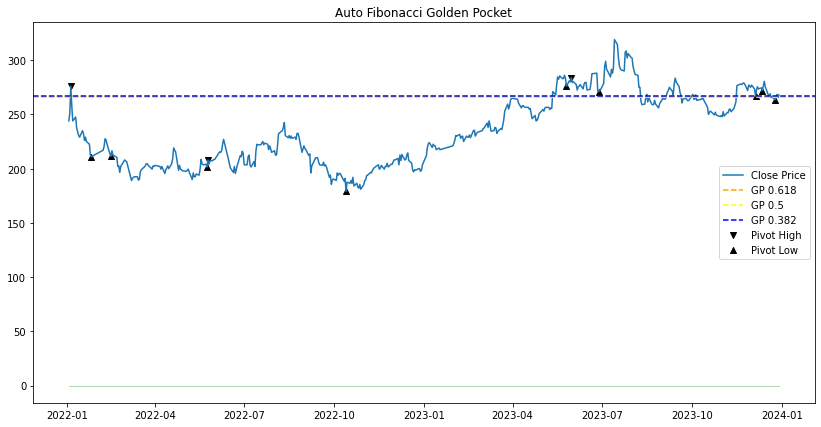

In [39]:
# 顯示圖形
plot_fibonacci_levels(df_6414, length=5, show_zero_and_half=True)

In [40]:
start = '2023-01-01'
end = '2023-12-31'

os.environ['mdate'] = start + ' ' + end
os.environ['ticker'] = ' '.join(tickers) + ' ' + 'IR0001'

!zipline ingest -b tquant  
# 填入：將價量資料導入的程式碼

Merging daily equity files:
Currently used TEJ API key call quota 437/1000 (43.7%)
Currently used TEJ API key data quota 4577734/10000000 (45.78%)


[2024-06-12 14:44:11.827402] INFO: zipline.data.bundles.core: Ingesting tquant.
[2024-06-12 14:44:15.296135] INFO: zipline.data.bundles.core: Ingest tquant successfully.


In [41]:
from zipline.api import *
from zipline.finance import commission, slippage

def initialize(context):
    context.day = 0
    context.tickers = tickers
    set_slippage(slippage.VolumeShareSlippage(volume_limit = 0.025, price_impact = 0.1))  # 用VolumeShareSlippage的滑價方式
    set_commission(commission.PerShare(cost=0.001425,min_trade_cost = 20))  #用PerShare的手續費收取方式
    set_benchmark(symbol('IR0001'))

In [42]:
# 判斷上漲或下跌趨勢
if df_2546.loc[df_2546['PivotHigh'].dropna().index[-1], 'Date'] > df_2546.loc[df_2546['PivotLow'].dropna().index[-1], 'Date']:
    trend = "up2546"
else:
    trend = "down2546"
# 判斷上漲或下跌趨勢
if df_6414.loc[df_6414['PivotHigh'].dropna().index[-1], 'Date'] > df_6414.loc[df_6414['PivotLow'].dropna().index[-1], 'Date']:
    trend = "up6414"
else:
    trend = "down6414"

In [52]:
def handle_data(context, data):
    # 回測第一天買進
    context.day=0
    holding2546=0
    holding6414=0
    a=0
    b=0
    if trend == "up2546":
        if df_2546['Close']<fib_0_5:
            order_value(i,1/3*capital_base)
            a=order_value(i,1/3*capital_base)
        elif df_2546['Close']>fib_0_5 & df_2546['Close']<fib_0_618 & df_2546['Close']>df_2546['MA']: #判斷買
            order_value(i,1/3*capital_base)
            a=order_value(i,1/3*capital_base)
        elif df_2546['Close']>fib_0_618: #判斷賣
            order(i,-holding2546)
            a=order(i,-holding2546)
        holding2546=holding2546+a
    elif trend == "down2546":
        if df_2546['Close']<fib_0_382: 
            a=order(i,-holding2546)
            order(i,-holding2546)
        elif df_2546['Close']>fib_0_382 & df_2546['Close']<fib_0_5 & df_2546['Close']<df_2546['MA']: #判斷賣
            a=order(i,-holding2546*0.5)
            order(i,-holding2546*0.5)
        elif df_2546['Close']>fib_0_5 & df_2546['Close']<fib_0_618 & df_2546['Close']<df_2546['MA']:#判斷賣
            a=order(i,-holding2546*0.5)
            order(i,-holding2546*0.5)
        elif df_2546['Close']>fib_0_618:
            a=order(i,1/3*capital_base)
            order(i,1/3*capital_base)
        holding2546=holding2546+a
        
    if trend == "up6414":
        if df_6414['Close']<fib_0_5:
            b=order_value(i,1/3*capital_base)
            order_value(i,1/3*capital_base)
        elif df_6414['Close']>fib_0_5 & df_6414['Close']<fib_0_618 & df_6414['Close']>df_6414['MA']: #判斷買
            b=order_value(i,1/3*capital_base)
            order_value(i,1/3*capital_base)
        elif df_6414['Close']>fib_0_618: #判斷賣
            b=order(i,-holding6414)
            order(i,-holding6414)
        holding6414=holding6414+b
    elif trend == "down6414":
        if df_6414['Close']<fib_0_382: 
            b=order(i,-holding6414)
            order(i,-holding6414)
        elif df_6414['Close']>fib_0_382 & df_6414['Close']<fib_0_5 & df_6414['Close']<df_6414['MA']: #判斷賣
            b=order(i,-holding6414*0.5)
            order(i,-holding6414*0.5)
        elif df_6414['Close']>fib_0_5 & df_6414['Close']<fib_0_618 & df_6414['Close']<df_6414['MA']:#判斷賣
            b=order(i,-holding6414*0.5)
            order(i,-holding6414*0.5)
        elif df_6414['Close']>fib_0_618:
            b=order(i,1/3*capital_base)
            order(i,1/3*capital_base)
        holding6414=holding6414+b
    context.day += 1  # 以免重複買進

In [53]:
import matplotlib.pyplot as plt

capital_base = 1e7  # 設定初始資金

def analyze(context, results):

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    results['benchmark_cum'] = results.benchmark_return.add(1).cumprod() * capital_base
    results[['portfolio_value', 'benchmark_cum']].plot(ax = ax1, label = 'Portfolio Value($)')
    ax1.set_ylabel('Portfolio value (TWD)')

    plt.legend(loc = 'upper left')

    plt.gcf().set_size_inches(18, 8)
    plt.grid()
    plt.show()

In [54]:
results['portfolio_value']

NameError: name 'results' is not defined

In [55]:
from zipline import run_algorithm
from zipline.utils.run_algo import get_transaction_detail

start_date = pd.Timestamp(start, tz = 'utc')
end_date = pd.Timestamp(end, tz = 'utc')  # 轉換成時間序列格式

results = run_algorithm(
    start = start_date,
    end = end_date,
    initialize = initialize,
    handle_data = handle_data,
    analyze = analyze,
    bundle = 'tquant',
    capital_base = capital_base,
)

results  # 回測結果

NameError: name 'fib_0_382' is not defined

In [ ]:
results.returns.cumsum().plot()  # 繪製累積回報圖

In [ ]:
from pyfolio.utils import extract_rets_pos_txn_from_zipline
import pyfolio

returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)  # 從 results 資料表中取出 returns, positions & transactions
benchmark_rets = results.benchmark_return  # 取出 benchmark 的報酬率

In [ ]:
# 繪製夏普比率圖

from pyfolio.plotting import plot_rolling_sharpe

plot_rolling_sharpe(returns,
                    factor_returns=benchmark_rets)